In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Lets import the data to take a look at what we have

In [2]:
auction = pd.read_csv('../data/external/auction.csv')
auction

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [3]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   bid           10681 non-null  float64
 2   bidtime       10681 non-null  float64
 3   bidder        10665 non-null  object 
 4   bidderrate    10670 non-null  float64
 5   openbid       10681 non-null  float64
 6   price         10681 non-null  float64
 7   item          10681 non-null  object 
 8   auction_type  10681 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [4]:
print(auction['item'].value_counts())
print(auction['auction_type'].value_counts())

Palm Pilot M515 PDA    5917
Xbox game console      2811
Cartier wristwatch     1953
Name: item, dtype: int64
7 day auction    7041
3 day auction    2023
5 day auction    1617
Name: auction_type, dtype: int64


In [5]:
#lets fix the auction type to be numerical

auction['auction_type'] = auction['auction_type'].str.replace(' day auction', '').astype(int)

auction.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.0,Cartier wristwatch,3
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.0,Cartier wristwatch,3
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3


In [6]:
#since the auction id column has dupes we can find the number of bids on an auction

auction['auctionid'].value_counts()

8214355679    75
8212629520    57
3023174478    54
3020532816    51
8212602164    50
              ..
3025639289     1
3023652961     1
3024121735     1
3025036419     1
3025035412     1
Name: auctionid, Length: 628, dtype: int64

In [7]:
auction["bid_no"] = auction.groupby("auctionid").cumcount()+1
auction.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,bid_no
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3,1
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3,2
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3,3
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3,4
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3,5
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3,1
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.0,Cartier wristwatch,3,2
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3,3
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.0,Cartier wristwatch,3,4
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3,5


In [8]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   bid           10681 non-null  float64
 2   bidtime       10681 non-null  float64
 3   bidder        10665 non-null  object 
 4   bidderrate    10670 non-null  float64
 5   openbid       10681 non-null  float64
 6   price         10681 non-null  float64
 7   item          10681 non-null  object 
 8   auction_type  10681 non-null  int32  
 9   bid_no        10681 non-null  int64  
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 792.9+ KB


In [9]:
#drop id columns we dont need to predict price
#we drop one of the item types for binary classification purposes
#this will reduce the dataset by roughly half, which is essential for the run time of our tuning
auction = auction.drop(columns= ['auctionid', 'bidder'])
auction = auction.dropna()
auction = auction[auction['item']!= 'Palm Pilot M515 PDA']
auction_class = auction
auction

,bid,bidtime,bidderrate,openbid,price,item,auction_type,bid_no
0,175.00,2.230949,0.0,99.00,177.50,Cartier wristwatch,3,1
1,100.00,2.600116,0.0,99.00,177.50,Cartier wristwatch,3,2
2,120.00,2.600810,2.0,99.00,177.50,Cartier wristwatch,3,3
3,150.00,2.601076,2.0,99.00,177.50,Cartier wristwatch,3,4
4,177.50,2.909826,4.0,99.00,177.50,Cartier wristwatch,3,5
...,...,...,...,...,...,...,...,...
10676,61.00,6.359155,15.0,0.01,90.01,Xbox game console,7,17
10677,76.00,6.359294,1.0,0.01,90.01,Xbox game console,7,18
10678,90.00,6.428738,3.0,0.01,90.01,Xbox game console,7,19
10679,88.00,6.760081,18.0,0.01,90.01,Xbox game console,7,20


In [10]:
#auction['item'] = auction['item'].str.replace('Cartier wristwatch', '3', n=-1)
#auction['item'] = auction['item'].str.replace('Palm Pilot M515 PDA', '2', n=-1)
#auction['item'] = auction['item'].str.replace('Xbox game console', '1', n=-1)
#auction['item'] = auction[['item']].apply(pd.to_numeric)

auction['item'] = pd.Categorical(auction['item'] )
auction= pd.get_dummies(auction, drop_first=True)
auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 10680
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bid                     4753 non-null   float64
 1   bidtime                 4753 non-null   float64
 2   bidderrate              4753 non-null   float64
 3   openbid                 4753 non-null   float64
 4   price                   4753 non-null   float64
 5   auction_type            4753 non-null   int32  
 6   bid_no                  4753 non-null   int64  
 7   item_Xbox game console  4753 non-null   uint8  
dtypes: float64(5), int32(1), int64(1), uint8(1)
memory usage: 283.1 KB


In [11]:
#run initial model to see reaction to data
from sklearn import linear_model

X = auction.drop(['price'], axis = 1)
y = auction['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = .2, random_state = 0)

model1 = linear_model.LinearRegression()
model1 = model1.fit(Xtrain, ytrain)



In [12]:
print(model1.intercept_, model1.coef_, model1.score(X, y))

225.20091652181378 [ 1.06693449e+00 -6.24934929e+01 -4.46899872e-02 -3.11606004e-02
  5.11167915e+01  9.98468415e-01 -2.13840540e+02] 0.827277678880125


In [13]:
#scale data on values which are not "categorical" or dummies

scaler = StandardScaler()

cols = ['bid','bidtime','bidderrate','openbid','price','bid_no']
for col in cols:
    auction[col] = scaler.fit_transform(auction[[col]])
    auction_class[col] = scaler.fit_transform(auction_class[[col]])
auction

,bid,bidtime,bidderrate,openbid,price,auction_type,bid_no,item_Xbox game console
0,-0.234826,-0.737010,-0.260960,0.086810,-0.459579,3,-1.128353,0
1,-0.395705,-0.583839,-0.260960,0.086810,-0.459579,3,-1.027806,0
2,-0.352804,-0.583551,-0.244035,0.086810,-0.459579,3,-0.927259,0
3,-0.288452,-0.583440,-0.244035,0.086810,-0.459579,3,-0.826713,0
4,-0.229463,-0.455336,-0.227110,0.086810,-0.459579,3,-0.726166,0
...,...,...,...,...,...,...,...,...
10676,-0.479362,0.975832,-0.134022,-0.324148,-0.599435,7,0.480394,1
10677,-0.447186,0.975889,-0.252497,-0.324148,-0.599435,7,0.580941,1
10678,-0.417156,1.004702,-0.235572,-0.324148,-0.599435,7,0.681488,1
10679,-0.421446,1.142181,-0.108634,-0.324148,-0.599435,7,0.782035,1


In [14]:
auction.to_csv(r"../data/processed/cleaned_auction_reg.csv", index = False, header = True)
auction_class.to_csv(r"../data/processed/cleaned_auction_class.csv", index = False, header = True)

In [15]:
auction_class

,bid,bidtime,bidderrate,openbid,price,item,auction_type,bid_no
0,-0.234826,-0.737010,-0.260960,0.086810,-0.459579,Cartier wristwatch,3,-1.128353
1,-0.395705,-0.583839,-0.260960,0.086810,-0.459579,Cartier wristwatch,3,-1.027806
2,-0.352804,-0.583551,-0.244035,0.086810,-0.459579,Cartier wristwatch,3,-0.927259
3,-0.288452,-0.583440,-0.244035,0.086810,-0.459579,Cartier wristwatch,3,-0.826713
4,-0.229463,-0.455336,-0.227110,0.086810,-0.459579,Cartier wristwatch,3,-0.726166
...,...,...,...,...,...,...,...,...
10676,-0.479362,0.975832,-0.134022,-0.324148,-0.599435,Xbox game console,7,0.480394
10677,-0.447186,0.975889,-0.252497,-0.324148,-0.599435,Xbox game console,7,0.580941
10678,-0.417156,1.004702,-0.235572,-0.324148,-0.599435,Xbox game console,7,0.681488
10679,-0.421446,1.142181,-0.108634,-0.324148,-0.599435,Xbox game console,7,0.782035


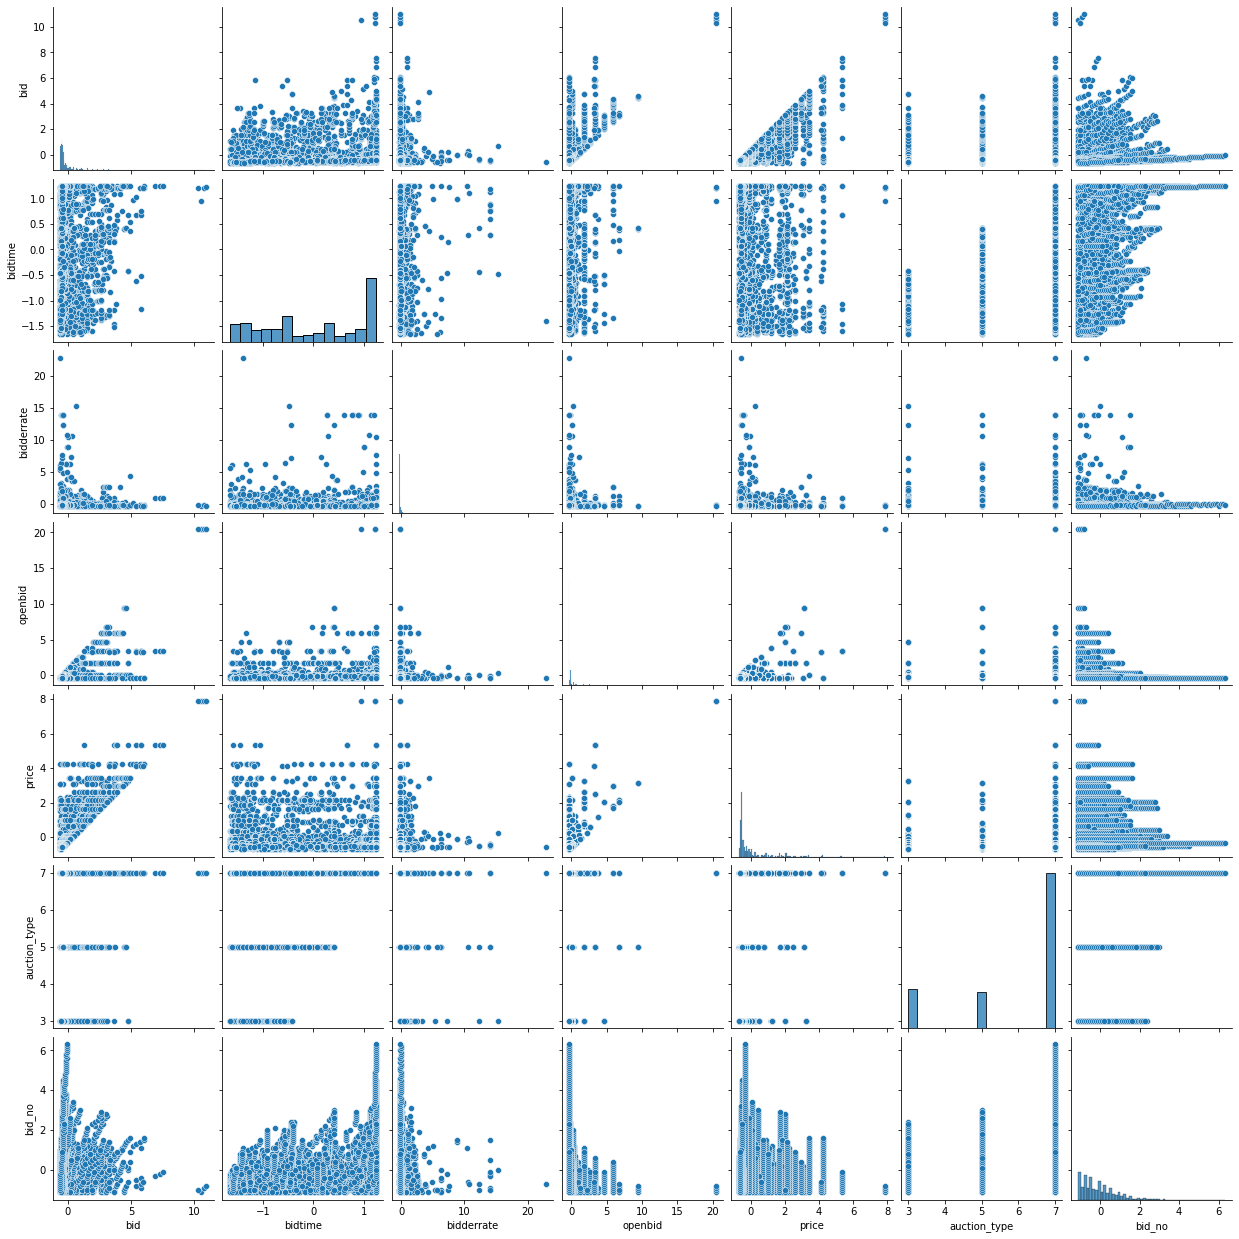

In [16]:
sns.pairplot(auction_class)


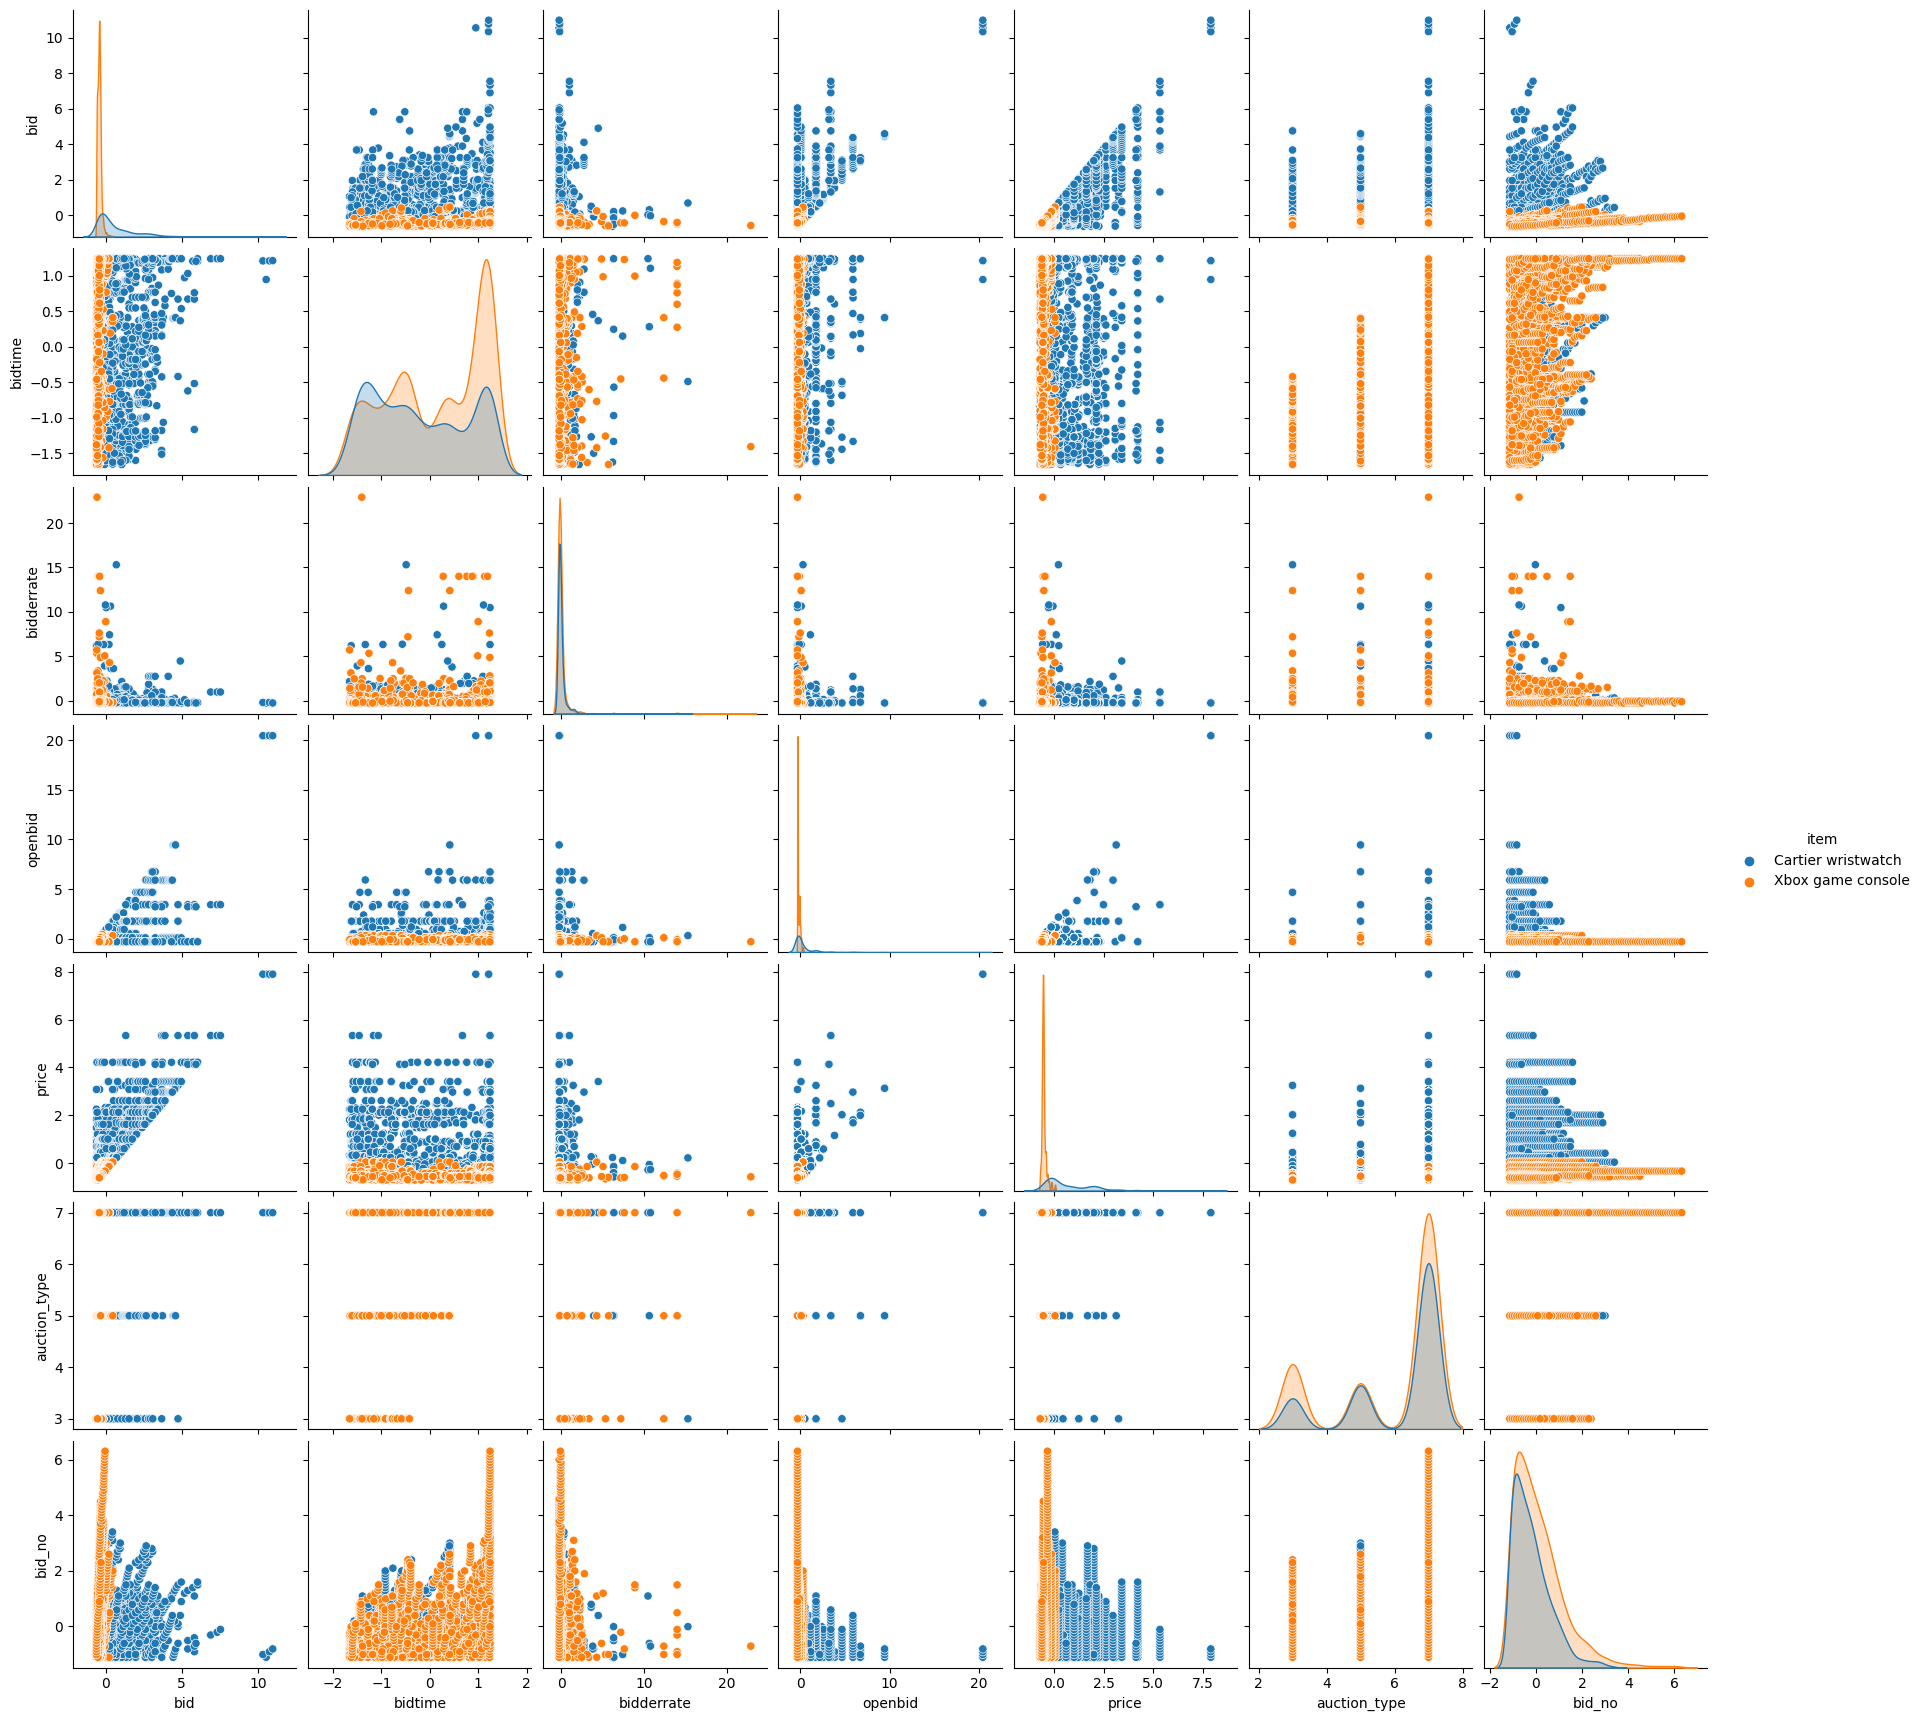

In [17]:
sns.pairplot(auction_class, hue = 'item')

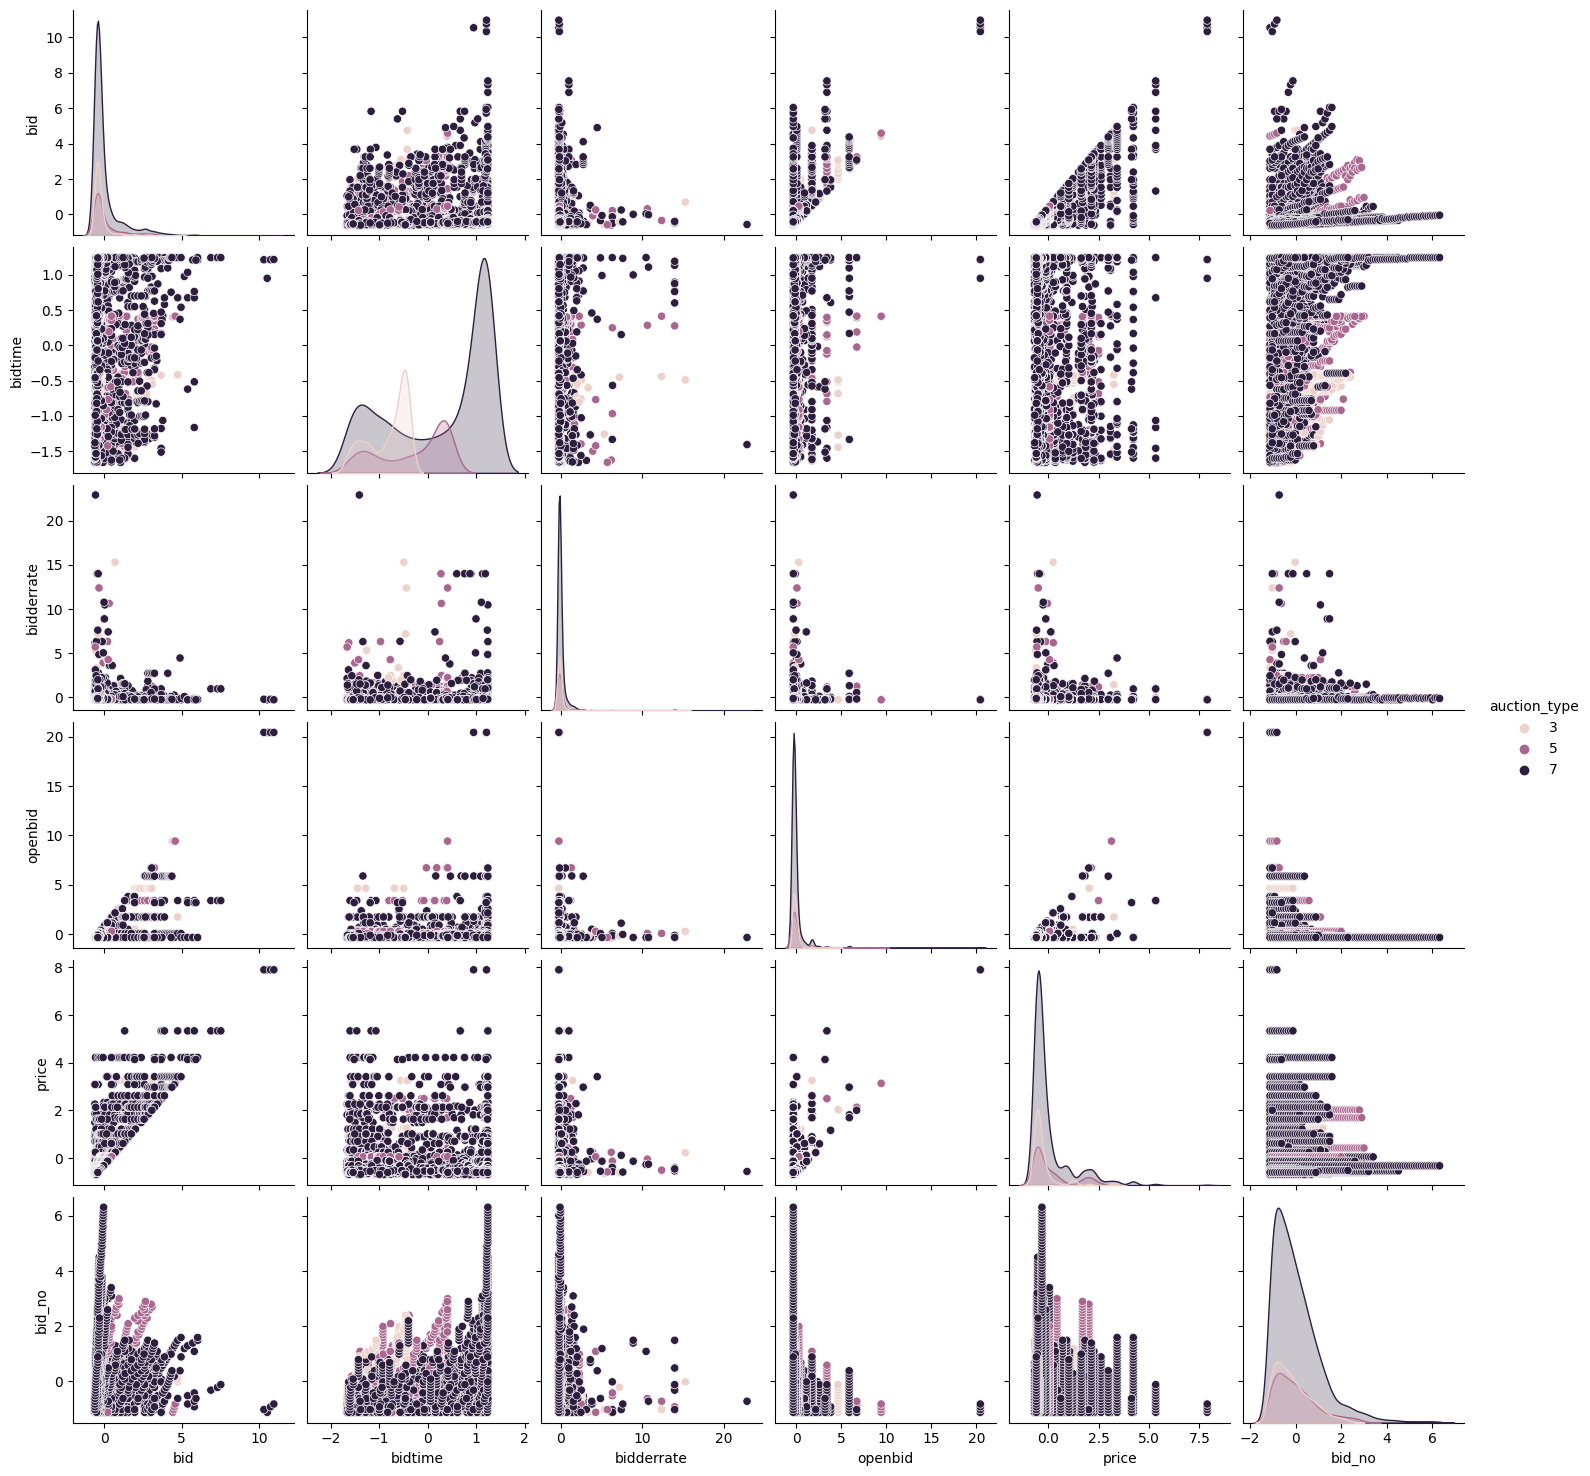

In [18]:
sns.pairplot(auction_class, hue = 'auction_type')